In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
import scipy.cluster.hierarchy
import scipy.spatial.distance
%matplotlib inline
features = ['X1', 'X2', 'X3', 'X4','X5', 'X6', 'X7', 'X8', 'X9'] 
f_len = len(features)

In [2]:
data = pd.read_excel(r'data4.xlsx', index_col='Наименование',sheet_name='Данные').loc[:, features]

data


,X1,X2,X3,X4,X5,X6,X7,X8,X9
Наименование,,,,,,,,,
Алтайский край,5.5,26010,16.5,43.0,4.446,100.0,77.55,21.51,3.07
Амурская область,5.2,39626,14.2,56.8,8.387,137.9,193.00,43.10,12.87
Архангельская область без автономного округа,6.6,37810,11.7,55.6,10.708,105.6,131.01,21.00,1.86
Астраханская область,7.7,26833,15.5,59.4,4.386,69.2,91.59,9.76,19.12
Белгородская область,4.2,35612,7.0,41.9,4.093,59.7,101.52,8.59,2.60
...,...,...,...,...,...,...,...,...,...
Чеченская Республика,14.5,26397,19.8,32.8,0.017,14.9,10.62,16.26,84.26
Чувашская Республика — Чувашия,4.8,23619,15.7,51.6,0.807,90.8,22.44,7.40,3.32
Чукотский автономный округ,2.6,99905,7.3,74.1,1.109,26.1,361.56,82.36,20.09


## Стандартизация данных

In [3]:
scaled = (data - data.mean(axis=0))/data.std()
scaled

,X1,X2,X3,X4,X5,X6,X7,X8,X9
Наименование,,,,,,,,,
Алтайский край,-0.043187,-0.640472,0.820570,-0.617207,0.046633,0.089562,-0.292829,0.031351,-0.532150
Амурская область,-0.148847,0.193379,0.297528,0.797597,1.132180,1.398699,0.149417,1.219594,-0.095081
Архангельская область без автономного округа,0.344235,0.082166,-0.270997,0.674571,1.771498,0.282997,-0.088044,0.003283,-0.586114
Астраханская область,0.731657,-0.590071,0.593160,1.064155,0.030106,-0.974327,-0.239047,-0.615330,0.183663
Белгородская область,-0.501049,-0.052441,-1.339822,-0.729982,-0.050601,-1.302475,-0.201009,-0.679723,-0.553111
...,...,...,...,...,...,...,...,...,...
Чеченская Республика,3.126627,-0.616772,1.571022,-1.662933,-1.173333,-2.849951,-0.549212,-0.257591,3.088835
Чувашская Республика — Чувашия,-0.289728,-0.786898,0.638642,0.264483,-0.955728,-0.228223,-0.503934,-0.745217,-0.521000
Чукотский автономный округ,-1.064571,3.884896,-1.271600,2.571230,-0.872542,-2.463082,0.795106,3.380334,0.226923


## Построение дендрограмм

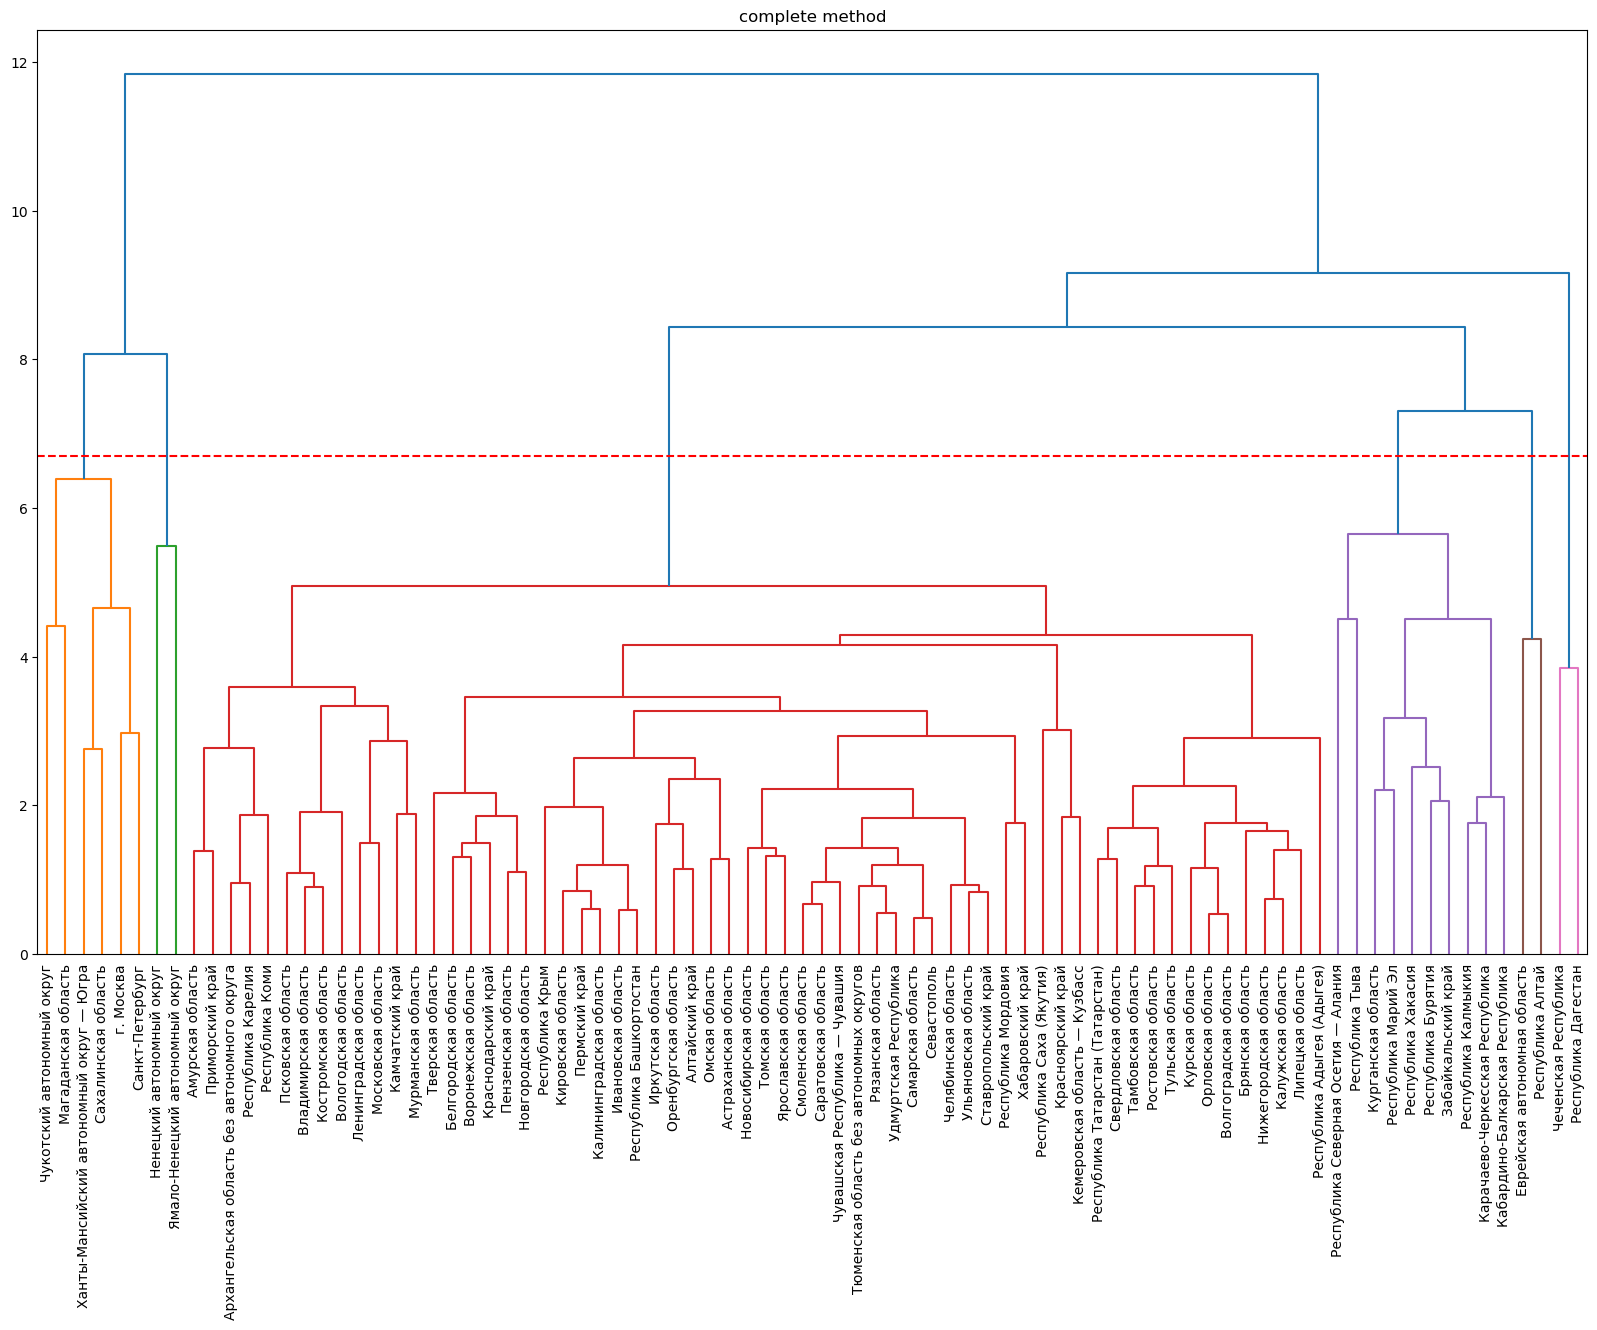

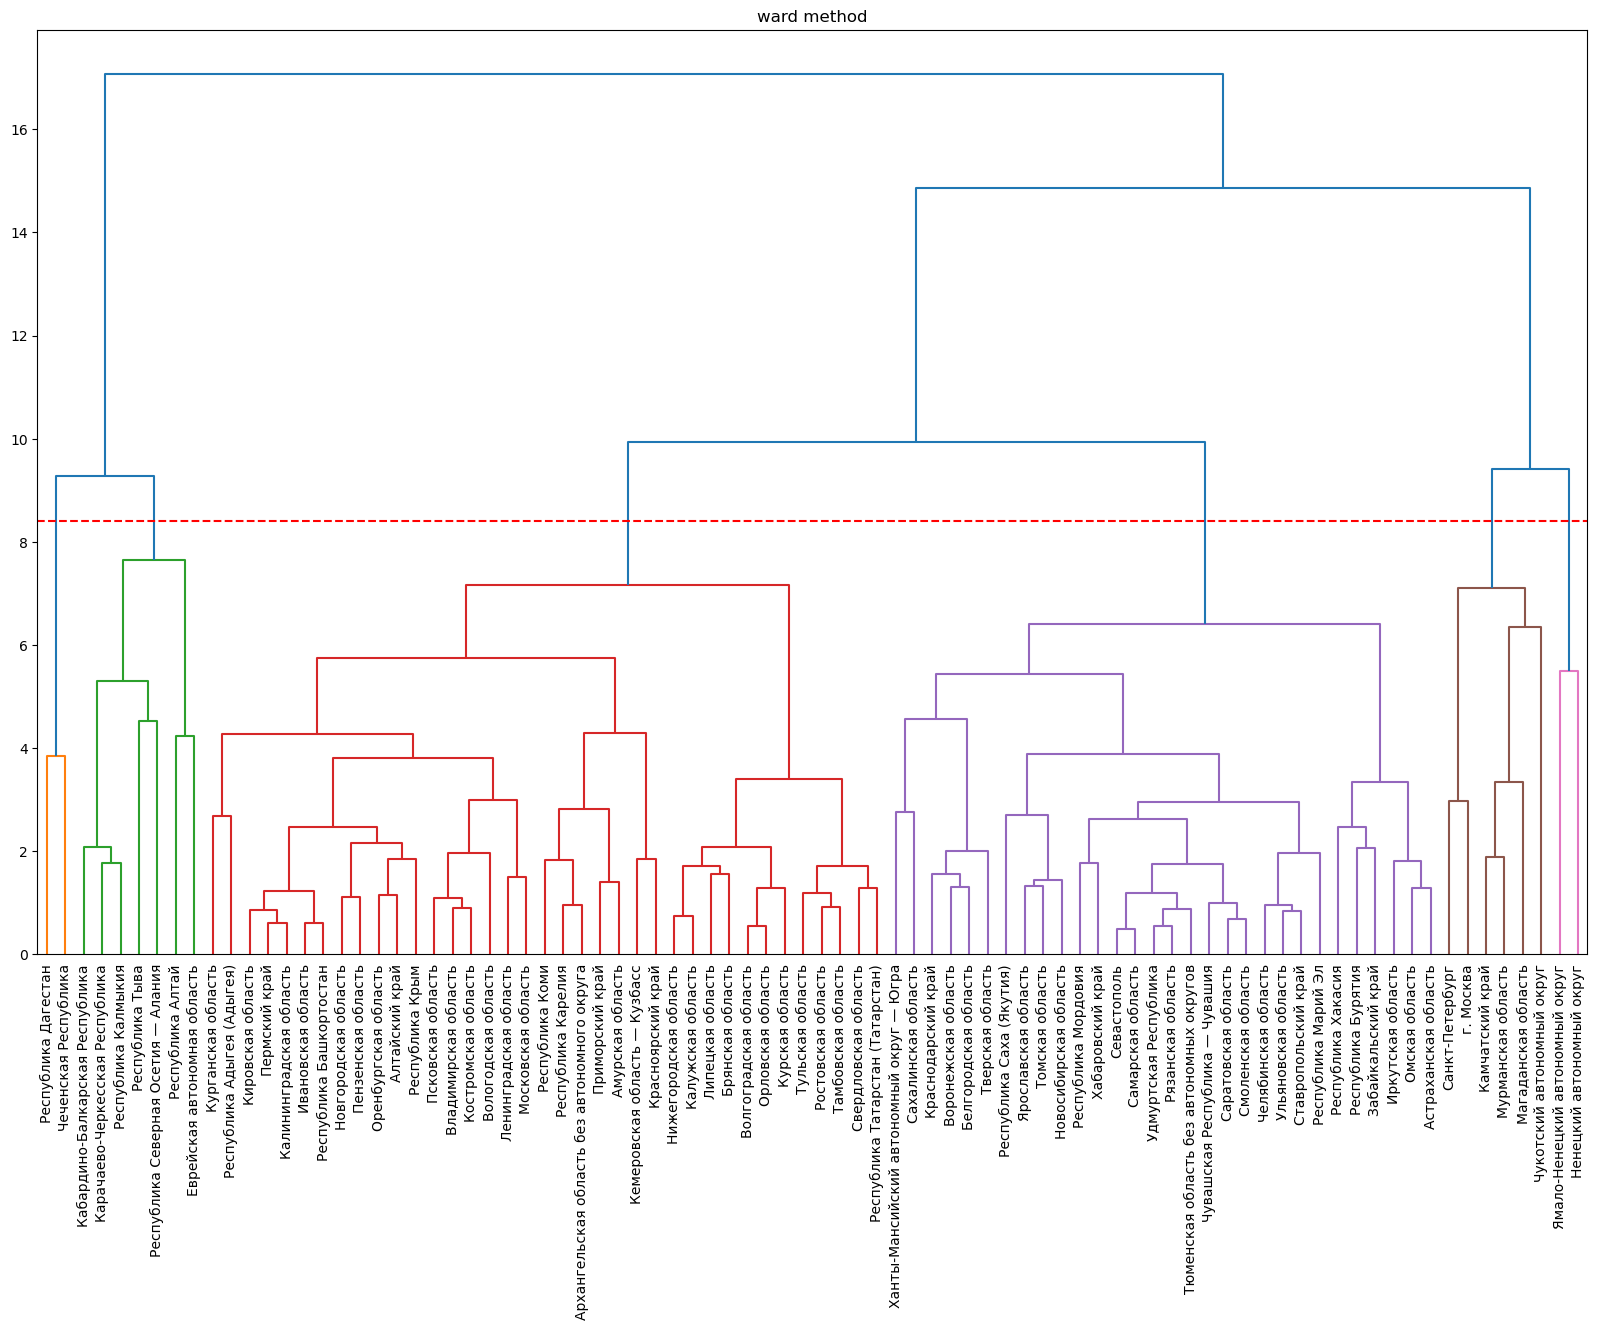

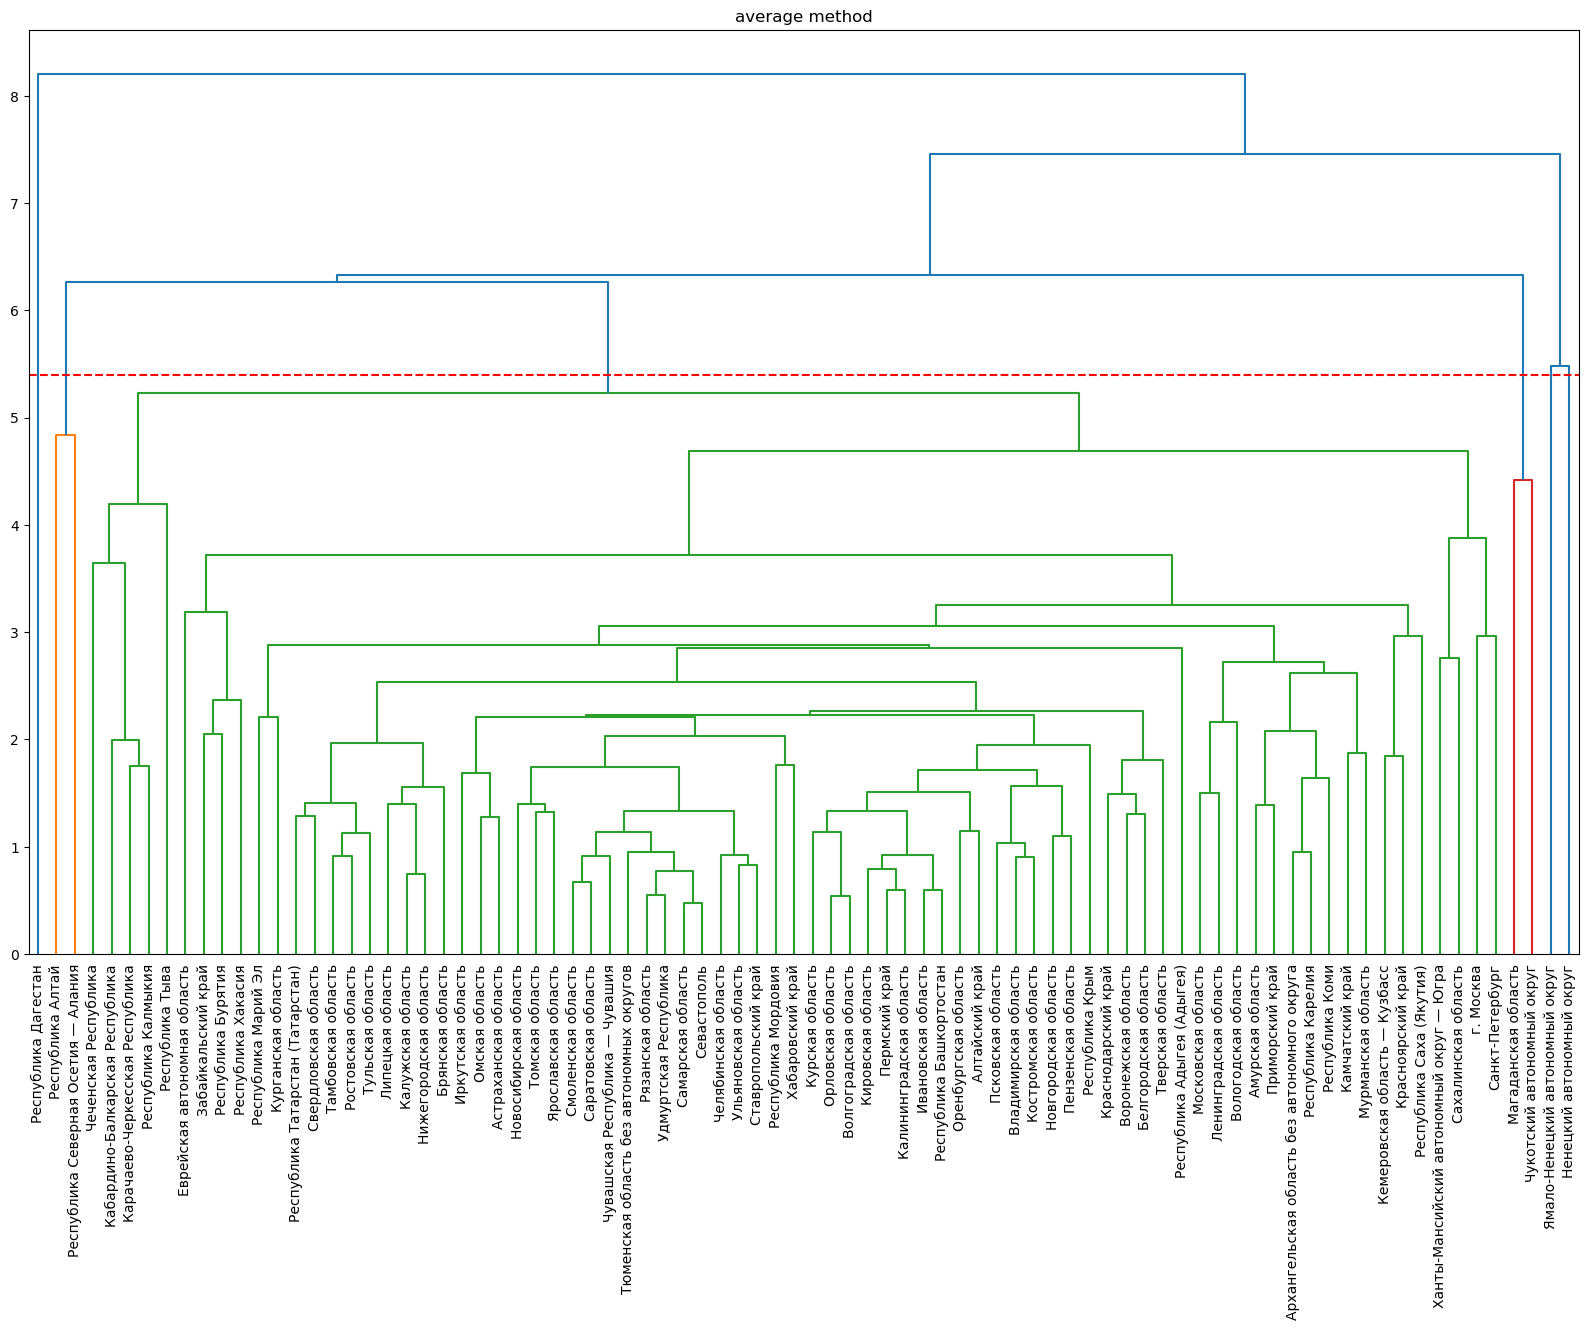

In [4]:
CLUSTER_METHODS = ["complete", "ward", "single", "average", "weighted", "centroid"]
def dendra(data,method,threshold):
  Z = hierarchy.linkage(data, method=method, optimal_ordering=True)
  plt.figure(figsize=(20,12)) 
  hierarchy.dendrogram(Z, labels=data.index, leaf_font_size=10,color_threshold=threshold) 
  plt.axhline(y=threshold, color='r', linestyle='--')
  plt.title('{} method'.format(method))
dendra(scaled,'complete',6.7) 
dendra(scaled,"ward",8.4)
dendra(scaled,"average",5.4)

## Кластеризация

In [5]:
CLUSTER_METHODS = ["complete", "ward", "kmeans", "average"]
N_CLUSTERS = {
    "complete" : 6,
    "ward"     : 6,
    "kmeans"  : 6,
    "average" : 6
}

complete = AgglomerativeClustering(n_clusters=N_CLUSTERS['complete'], linkage='complete')
complete.fit(scaled)
print("complete\n",complete.labels_+1,"\n")

#метод Ward'a
ward = AgglomerativeClustering(n_clusters=N_CLUSTERS['ward'], linkage='ward')
ward.fit(scaled)
print("ward\n",ward.labels_+1,"\n")

#метод k-means
kmeans = KMeans(n_clusters=N_CLUSTERS['kmeans'])
kmeans.fit(scaled)
print("kmeans\n",kmeans.labels_+1,"\n")


#метод невзвешенного попарного среднего
average = AgglomerativeClustering(n_clusters=N_CLUSTERS['average'], linkage='average')
average.fit(scaled)
print("average\n", average.labels_+1,"\n")



complete
 [4 4 4 4 4 4 4 4 4 4 1 3 2 4 4 2 4 4 4 2 4 4 4 4 4 2 4 4 4 1 4 4 5 4 4 4 4
 4 4 4 4 4 4 4 3 4 2 6 2 4 4 4 2 4 4 2 4 2 2 4 4 4 1 4 1 4 4 4 4 4 4 4 4 4
 4 4 4 1 4 6 4 1 5 4] 

ward
 [3 3 3 4 4 3 3 3 3 4 2 1 4 3 4 1 3 3 2 1 3 3 3 4 3 3 3 3 3 2 3 2 5 3 3 4 4
 3 3 3 3 3 3 3 1 3 4 6 1 3 3 3 4 4 4 1 3 1 4 3 4 4 2 4 4 3 4 4 4 3 4 4 3 4
 4 4 4 4 4 6 4 2 5 4] 



D:\CONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\CONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


kmeans
 [3 1 1 3 3 1 1 3 1 3 2 5 5 1 1 4 1 1 1 4 1 1 1 3 1 5 3 1 1 2 1 1 6 1 1 3 3
 3 1 3 1 1 1 3 5 1 5 4 4 1 1 3 3 3 3 5 3 5 5 3 3 3 2 3 2 3 3 3 3 3 3 3 3 3
 3 3 3 2 3 4 3 2 6 3] 

average
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1 6 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 4 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 5 3 1] 



## Работа с метками кластеров
## Построение графиков средних значений

In [6]:
scaled['complete'] = complete.labels_
scaled['ward'] = ward.labels_
scaled['kmeans'] = kmeans.labels_
scaled['average'] = average.labels_

def mean_df(method, n_clust):
    mean_data = np.array([]).reshape(0, f_len+1)
    for n in range(n_clust):
        tmp = [] 
        for j in range(f_len):
            tmp.append(scaled[scaled[method] == n].iloc[:, j].mean())
            
        tmp.append(scaled[scaled[method] == n].shape[0])
        mean_data = np.vstack((mean_data, np.array(tmp).reshape(1, f_len+1)))

    return mean_data

columns = features + ['count']
means = {}

for method, n in N_CLUSTERS.items():
    means[method] = pd.DataFrame(
        mean_df(method, n), 
        columns=columns, 
        index=["{}_{}".format(method, i) for i in range(n)]
    )

for method in CLUSTER_METHODS:
    print(means[method])

                  X1        X2        X3        X4        X5        X6  \
complete_0 -0.806290  2.342615 -1.366354  2.251702 -0.215733 -0.675540   
complete_1  1.538198 -0.730502  1.559652 -0.314767 -0.505120 -0.384352   
complete_2  1.136689 -0.576935  2.162288 -0.986287  0.913748 -0.128052   
complete_3 -0.298817 -0.183148 -0.177465 -0.123613  0.092344  0.211072   
complete_4 -0.377778  3.377672 -1.351193  0.884741  0.412017  0.022205   
complete_5  3.232288 -0.498486  0.991127 -1.247718 -1.015638 -2.488988   

                  X7        X8        X9  count  
complete_0  0.377881  0.441008  0.236958    6.0  
complete_1 -0.348813  0.629600  0.395373   10.0  
complete_2 -0.319452  4.216892 -0.467481    2.0  
complete_3 -0.117321 -0.289681 -0.225439   62.0  
complete_4  5.129685 -0.074319  0.061239    2.0  
complete_5 -0.562849  0.366525  4.707106    2.0  
              X1        X2        X3        X4        X5        X6        X7  \
ward_0  2.014677 -0.760478  1.915386 -0.087022 -0.3

## Построение графиков средних

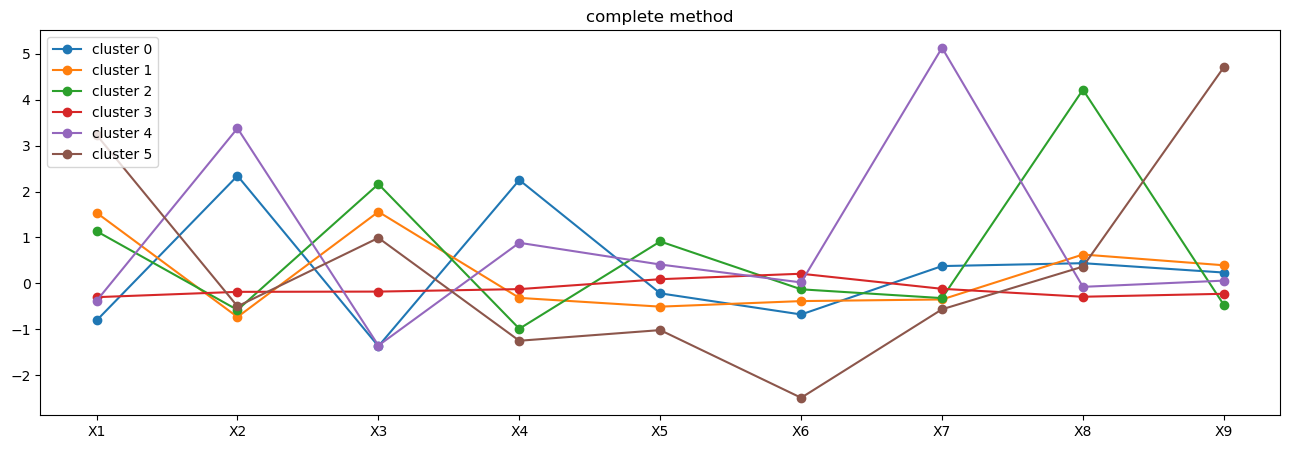

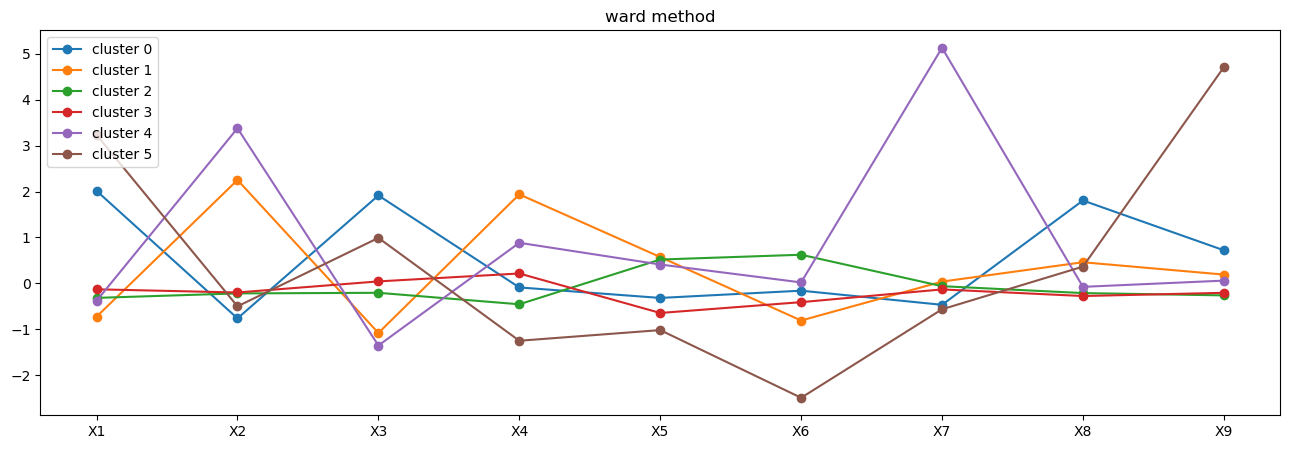

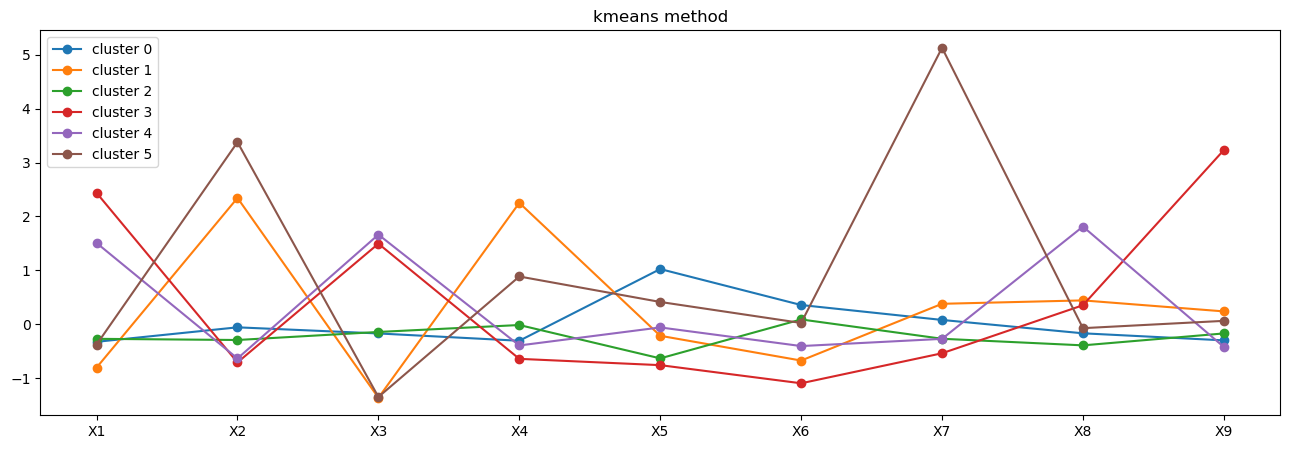

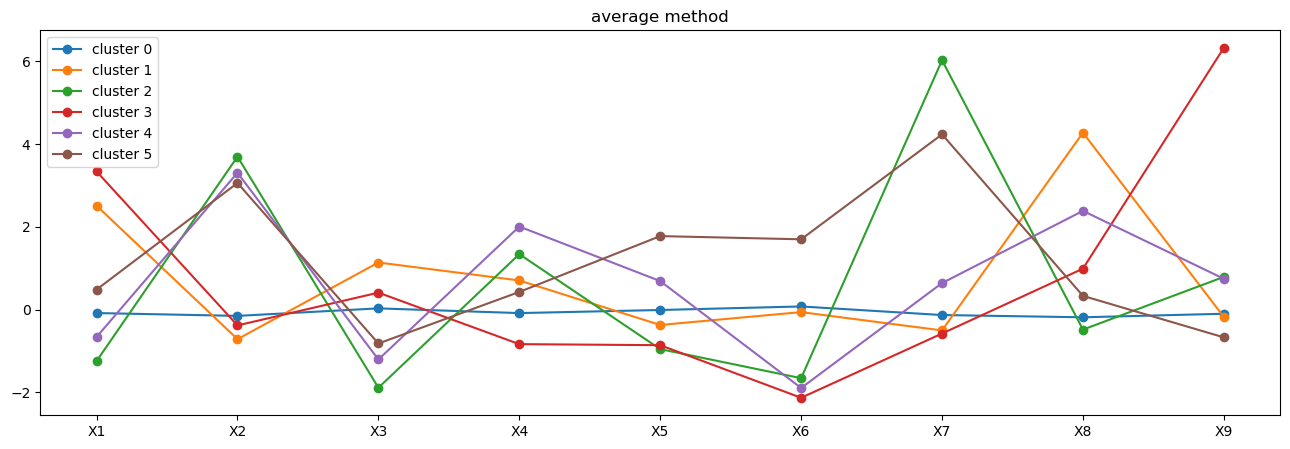

In [7]:
for method in CLUSTER_METHODS:
    cur_mean = means[method] 
    plt.figure(figsize=(16,5))
    for n in range(cur_mean.shape[0]): 
        plt.plot(features, cur_mean.iloc[n, :-1], marker='o', label='cluster {}'.format(n))
        plt.legend(loc = 'upper left') 
    plt.title('{} method'.format(cur_mean.index[1][:-2])) 


## Выгрузка элементов в кластерах

In [8]:

cluster_dict = {}

for method, n in N_CLUSTERS.items():
    print('{} method\n'.format(method)) 
    for i in range(n): 
        cluster_dict['{}_{}'.format(method, i)] = scaled[scaled[method]==i][features]
                
        print ('Состав кластера {}: {}'.format(i, cluster_dict['{}_{}'.format(method, i)].index.values))      
    print ('\n')


complete method

Состав кластера 0: ['г. Москва' 'Магаданская область' 'Санкт-Петербург' 'Сахалинская область'
 'Ханты-Мансийский автономный округ — Югра' 'Чукотский автономный округ']
Состав кластера 1: ['Забайкальский край' 'Кабардино-Балкарская Республика'
 'Карачаево-Черкесская Республика' 'Курганская область'
 'Республика Бурятия' 'Республика Калмыкия' 'Республика Марий Эл'
 'Республика Северная Осетия — Алания' 'Республика Тыва'
 'Республика Хакасия']
Состав кластера 2: ['Еврейская автономная область' 'Республика Алтай']
Состав кластера 3: ['Алтайский край' 'Амурская область'
 'Архангельская область без автономного округа' 'Астраханская область'
 'Белгородская область' 'Брянская область' 'Владимирская область'
 'Волгоградская область' 'Вологодская область' 'Воронежская область'
 'Ивановская область' 'Иркутская область' 'Калининградская область'
 'Калужская область' 'Камчатский край' 'Кемеровская область — Кузбасс'
 'Кировская область' 'Костромская область' 'Краснодарский край'
 '

## Функционал качества разбиения

In [13]:
mean_data = pd.DataFrame()
for method in CLUSTER_METHODS:
    mean_data = mean_data._append(means[method])
def Q(method_num, mean_data_row):
    q = 0 
    for i in range(len(method_num)): 
        t=0
        for j, feature in zip(range(len(features)), features):
            t += (method_num.iloc[i, j] - mean_data_row[feature][0])**2 
        q += t
    return q


Q_dict = {}
k = 0
for method in N_CLUSTERS.keys():
    t = 0
    for n in range(N_CLUSTERS[method]):
        t += Q(cluster_dict['{}_{}'.format(method, n)], pd.DataFrame(mean_data.iloc[k]).T)
        k += 1   
    Q_dict['Q_{}'.format(method)]=round(t, 3)
Q_dict    


{'Q_complete': 355.172,
 'Q_ward': 354.212,
 'Q_kmeans': 326.843,
 'Q_average': 474.244}